# **🏡 Tehran House Price Prediction (2025)**

📌 Author: Nazanin Mahmoudy   
📌 Project Type: Machine Learning Regression    
📌 Tech Stack: Python, Pandas, NumPy, Scikit-Learn, XGBoost, Matplotlib, Seaborn     
📌 Objective: Predict housing prices in Tehran based on various factors like location, area, number     of rooms, and amenities.       

📌 Dataset Source: https://www.kaggle.com/datasets/valakhorasani/tehran-house-prices-dataset/data            
📌 Contact: Nazaninmahmoudy@gmail.com | https://github.com/Nazaninmahmoudi     

📌 Project Overview    
This notebook explores and predicts house prices in Tehran using machine learning models. The dataset includes various features such as:

📍 Location (Address)

📏 Area (Square meters)

🏠 Number of rooms

🚗 Parking availability

📦 Warehouse availability

🚪 Elevator access

We apply feature engineering, data preprocessing, and model evaluation using multiple regression algorithms to find the best-performing model.

📊 Machine Learning Models Used
Linear Regression

Lasso Regression

Decision Tree Regression

Random Forest Regression

XGBoost Regression (Final Model)

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams['figure.figsize']=(20,10)
import seaborn as sns


# Preproccesing 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Feature Selection
from sklearn.feature_selection import SelectFromModel
# Cross Validation 

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# score
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,accuracy_score

import warnings
warnings.filterwarnings("ignore")


In [6]:
df = pd.read_csv('/kaggle/input/tehran-realstate/TehranHouse.csv')


**Exploring the Dataset**

In [7]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [9]:
df.shape

(3479, 8)

**Data Cleaning and Formating (Preproessing)**

In [10]:
# pd.options.display.float_format = '{:.0f}'.format  

fdata = df.copy()

fdata['Price'] = pd.to_numeric(fdata['Price'], errors='coerce')  
fdata['Price(USD)'] = pd.to_numeric(fdata['Price(USD)'], errors='coerce')  
fdata['Area'] = pd.to_numeric(fdata['Area'], errors='coerce')  
fdata['Room'] = pd.to_numeric(fdata['Room'], errors='coerce')  

fdata = fdata.dropna(subset=['Price', 'Price(USD)','Room','Area'])
fdata

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86.0,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83.0,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75.0,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105.0,2,True,True,True,Dorous,5.600000e+09,186666.67


In [11]:
fdata['Price'] = fdata['Price'].apply(lambda x: '{:,.2f}'.format(x))
fdata['Price(USD)'] = fdata['Price(USD)'].apply(lambda x: '{:,.2f}'.format(x))
fdata

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,"1,850,000,000.00","61,666.67"
1,60.0,1,True,True,True,Shahran,"1,850,000,000.00","61,666.67"
2,79.0,2,True,True,True,Pardis,"550,000,000.00","18,333.33"
3,95.0,2,True,True,True,Shahrake Qods,"902,500,000.00","30,083.33"
4,123.0,2,True,True,True,Shahrake Gharb,"7,000,000,000.00","233,333.33"
...,...,...,...,...,...,...,...,...
3474,86.0,2,True,True,True,Southern Janatabad,"3,500,000,000.00","116,666.67"
3475,83.0,2,True,True,True,Niavaran,"6,800,000,000.00","226,666.67"
3476,75.0,2,False,False,False,Parand,"365,000,000.00","12,166.67"
3477,105.0,2,True,True,True,Dorous,"5,600,000,000.00","186,666.67"


In [12]:
fdata.rename(columns={'Price(USD)': 'Price_USD'}, inplace=True)

In [13]:
fdata.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address      23
Price         0
Price_USD     0
dtype: int64

In [14]:
Cleaned_df=fdata.dropna()
Cleaned_df.isnull().sum()

Area         0
Room         0
Parking      0
Warehouse    0
Elevator     0
Address      0
Price        0
Price_USD    0
dtype: int64

**apply dimensionality reduction technique**

In [15]:
Cleaned_df .groupby('Area')['Area'].agg('count')

Area
30.0     1
32.0     2
33.0     1
35.0     3
37.0     8
        ..
705.0    1
750.0    2
863.0    1
900.0    1
929.0    1
Name: Area, Length: 237, dtype: int64

In [16]:
location_state=Cleaned_df['Address'].value_counts(ascending=False)
location_state

Address
Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                140
Shahran                   130
                         ... 
Chardangeh                  1
Mehrabad                    1
Pakdasht KhatunAbad         1
Kazemabad                   1
Yakhchiabad                 1
Name: count, Length: 192, dtype: int64

In [17]:
location_state.values.sum()

3450

In [18]:
len(location_state[location_state>10])

64

In [19]:
len(location_state)

192

In [20]:
len(location_state[location_state<=10])

128

In [21]:
location_stats_less10 = location_state[location_state<=10]
location_stats_less10

Address
Zafar                  10
Gholhak                10
Ozgol                  10
Air force              10
Gisha                   9
                       ..
Chardangeh              1
Mehrabad                1
Pakdasht KhatunAbad     1
Kazemabad               1
Yakhchiabad             1
Name: count, Length: 128, dtype: int64

In [22]:
len(Cleaned_df.Address.unique())

192

In [67]:
pd.options.display.float_format = '{:.0f}'.format  
Cleaned_df.Address = Cleaned_df.Address.apply(lambda x: 'other' if x in location_stats_less10 else x)
len(Cleaned_df.Address.unique())
Cleaned_df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price_USD
0,63,1,True,True,True,Shahran,"1,850,000,000.00","61,666.67"
1,60,1,True,True,True,Shahran,"1,850,000,000.00","61,666.67"
2,79,2,True,True,True,Pardis,"550,000,000.00","18,333.33"
3,95,2,True,True,True,Shahrake Qods,"902,500,000.00","30,083.33"
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000.00","233,333.33"


**Otlier Detection**

**Removing houses larger than 1000 Meters**

In [24]:
ou_data=Cleaned_df.copy()
ou_data =ou_data[ou_data['Area'] <= 1000]
ou_data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price_USD
0,63,1,True,True,True,Shahran,"1,850,000,000.00","61,666.67"
1,60,1,True,True,True,Shahran,"1,850,000,000.00","61,666.67"
2,79,2,True,True,True,Pardis,"550,000,000.00","18,333.33"
3,95,2,True,True,True,Shahrake Qods,"902,500,000.00","30,083.33"
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000.00","233,333.33"
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,"3,500,000,000.00","116,666.67"
3475,83,2,True,True,True,Niavaran,"6,800,000,000.00","226,666.67"
3476,75,2,False,False,False,Parand,"365,000,000.00","12,166.67"
3477,105,2,True,True,True,Dorous,"5,600,000,000.00","186,666.67"


In [25]:
ou_data['Room'].unique()

array([1, 2, 3, 0, 4, 5])

In [26]:
ou_data[ou_data['Room']==0]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price_USD
103,40,0,False,False,False,Shahrake Qods,"248,000,000.00","8,266.67"
137,40,0,False,False,False,Pakdasht,"165,000,000.00","5,500.00"
1169,40,0,False,True,False,Ostad Moein,"650,000,000.00","21,666.67"
2084,40,0,False,False,False,Pakdasht,"165,000,000.00","5,500.00"
2103,43,0,False,True,False,other,"360,000,000.00","12,000.00"
2625,50,0,True,True,True,Northern Chitgar,"345,000,000.00","11,500.00"
2721,110,0,True,True,True,Parand,"102,000,000.00","3,400.00"
3107,630,0,False,False,False,other,"75,600,000,000.00","2,520,000.00"
3211,30,0,False,True,False,Ostad Moein,"500,000,000.00","16,666.67"
3435,54,0,False,False,False,Shahrake Qods,"470,000,000.00","15,666.67"


In [27]:
ou_data[ou_data['Room'] == 5]['Area'].describe()

count    33
mean    383
std     210
min      58
25%     245
50%     350
75%     420
max     929
Name: Area, dtype: float64

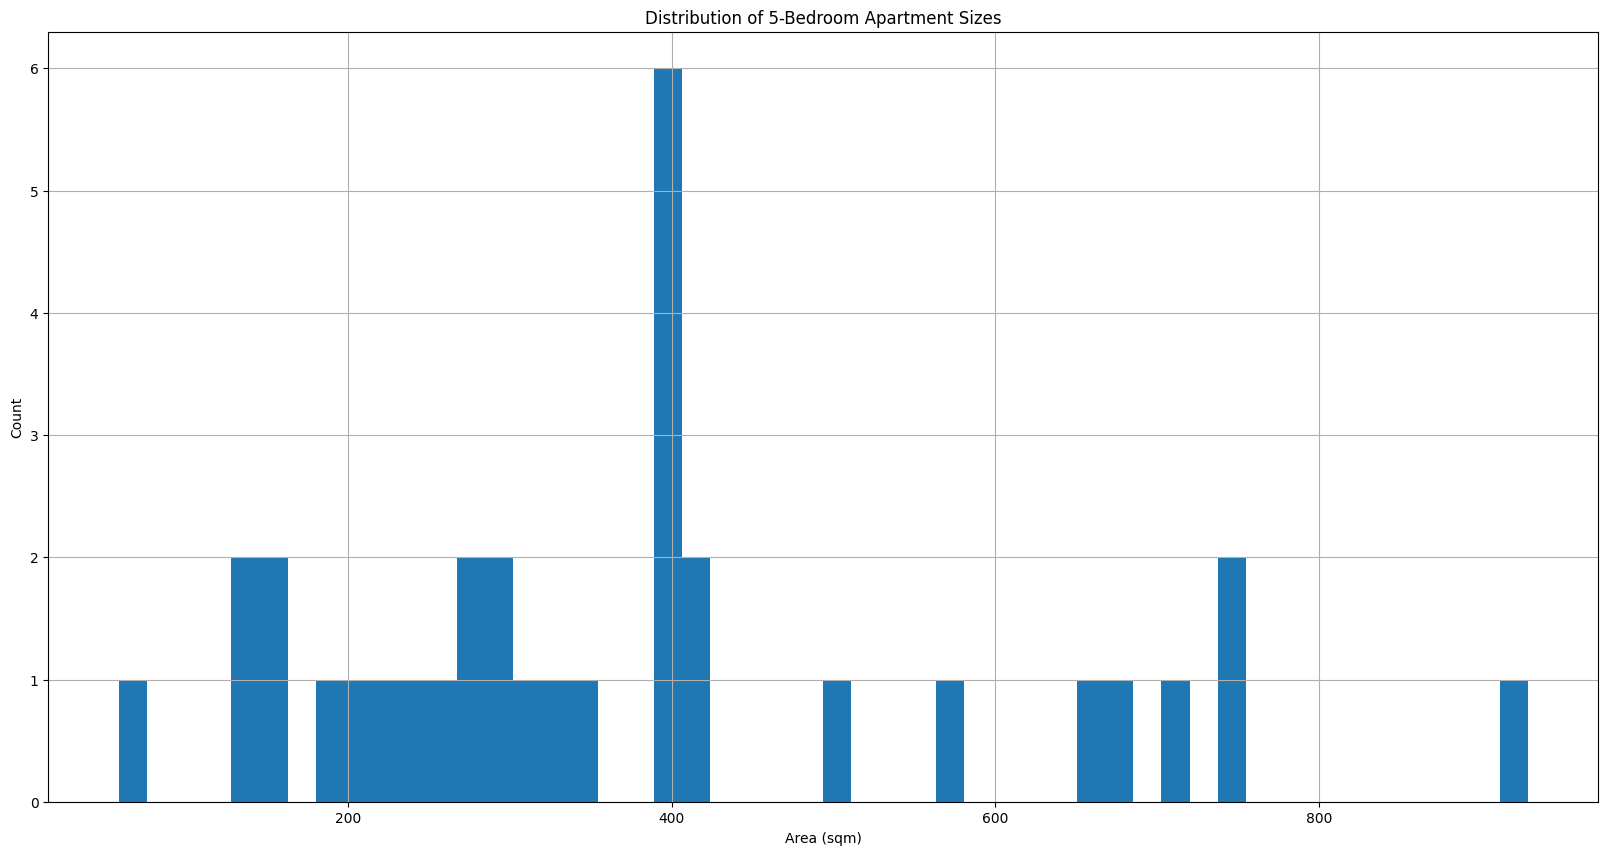

In [28]:
ou_data[ou_data['Room'] == 5]['Area'].hist(bins=50)
plt.xlabel('Area (sqm)')
plt.ylabel('Count')
plt.title('Distribution of 5-Bedroom Apartment Sizes')
plt.show()

In [29]:
ou_data[(ou_data['Area'] < 35) & (ou_data['Room'] == 0)].shape[0] > 0

True

In [30]:
ou_data[(ou_data['Room'] == 2) & (ou_data['Area'] < 55)].shape[0]


12

In [31]:
ou_data[(ou_data['Area'] < 55) & (ou_data['Room'] == 2)]


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price_USD
8,54,2,True,True,False,Andisheh,"493,000,000.00","16,433.33"
776,54,2,True,True,False,Shahran,"1,850,000,000.00","61,666.67"
846,51,2,False,True,True,Komeil,"1,050,000,000.00","35,000.00"
1929,50,2,True,True,False,Shahran,"1,820,000,000.00","60,666.67"
2160,51,2,True,True,False,Shahran,"1,850,000,000.00","61,666.67"
2341,53,2,True,True,False,Jeyhoon,"1,100,000,000.00","36,666.67"
2688,50,2,True,True,True,Persian Gulf Martyrs Lake,"330,000,000.00","11,000.00"
2780,50,2,False,True,False,Jeyhoon,"730,000,000.00","24,333.33"
2845,53,2,False,False,False,Tenant,"1,100,000,000.00","36,666.67"
3036,41,2,False,False,False,Salsabil,"790,000,000.00","26,333.33"


**Removing Outliers**

In [32]:
re_data=ou_data.copy()
re_data = re_data.loc[~((re_data['Room'] == 0) & (re_data['Area'] > 60))]
re_data = re_data.loc[~((re_data['Room'] == 1) & (re_data['Area'] > 105))]
re_data = re_data.loc[~((re_data['Room'] == 2) & (re_data['Area'] > 171))]
re_data = re_data.loc[~((re_data['Room'] == 2) & (re_data['Area'] < 55))]
re_data = re_data.loc[~((re_data['Room'] == 3) & (re_data['Area'] > 331))]
re_data = re_data.loc[~((re_data['Room'] == 4) & (re_data['Area'] < 140))]
re_data = re_data.loc[~((re_data['Room'] == 5) & (re_data['Area'] < 200))]
re_data.shape

(3390, 8)

**Outlier Removal Using Standard Deviation and Mean**

**Creating a new Columns of price per sqm**

In [33]:
re_data['Price'] = re_data['Price'].astype(str).str.strip()  
re_data['Price'] = re_data['Price'].str.replace(r'[^\d.]', '', regex=True)  
re_data['Price'] = pd.to_numeric(re_data['Price'], errors='coerce') 
re_data['Price_Per_sqm'] = re_data['Price'] / re_data['Area']
re_data['Price'] = re_data['Price'].apply(lambda x: '{:,.2f}'.format(x))
re_data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price_USD,Price_Per_sqm
0,63,1,True,True,True,Shahran,"1,850,000,000.00","61,666.67",29365079
1,60,1,True,True,True,Shahran,"1,850,000,000.00","61,666.67",30833333
2,79,2,True,True,True,Pardis,"550,000,000.00","18,333.33",6962025
3,95,2,True,True,True,Shahrake Qods,"902,500,000.00","30,083.33",9500000
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000.00","233,333.33",56910569
...,...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,"3,500,000,000.00","116,666.67",40697674
3475,83,2,True,True,True,Niavaran,"6,800,000,000.00","226,666.67",81927711
3476,75,2,False,False,False,Parand,"365,000,000.00","12,166.67",4866667
3477,105,2,True,True,True,Dorous,"5,600,000,000.00","186,666.67",53333333


In [34]:
re_data['Price'] = re_data['Price'].str.replace(',', '').astype(float)
re_data['Price_USD'] = re_data['Price_USD'].str.replace(',', '').astype(float)


In [35]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()  
    for key, subdf in df.groupby('Address'):  
        m = np.mean(subdf.Price_Per_sqm) 
        st = np.std(subdf.Price_Per_sqm) 

        reduced_df = subdf[(subdf.Price_Per_sqm > (m - st)) & (subdf.Price_Per_sqm <= (m + st))]

        df_out = pd.concat([df_out, reduced_df], ignore_index=True)

    return df_out


In [36]:
p_data=re_data.copy()
p_data=remove_pps_outliers(re_data)
p_data.shape

(2596, 9)

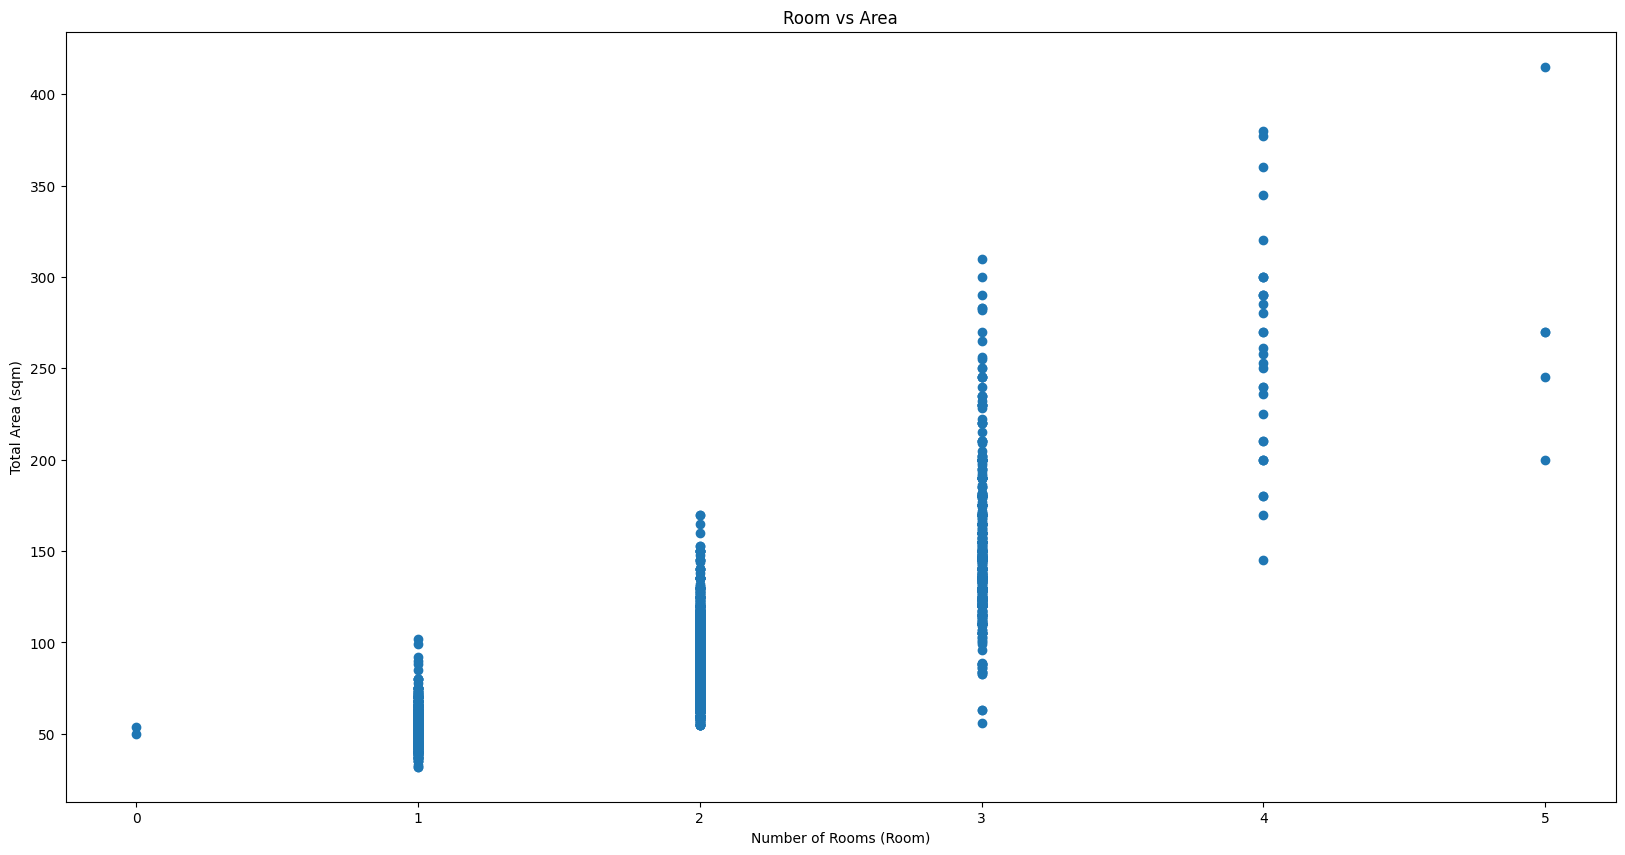

In [37]:
plt.scatter(p_data['Room'], p_data['Area'])
plt.xlabel("Number of Rooms (Room)")
plt.ylabel("Total Area (sqm)")
plt.title("Room vs Area")
plt.show()


**visualizing the relationship between property area and price for a specific address based on the number of rooms**

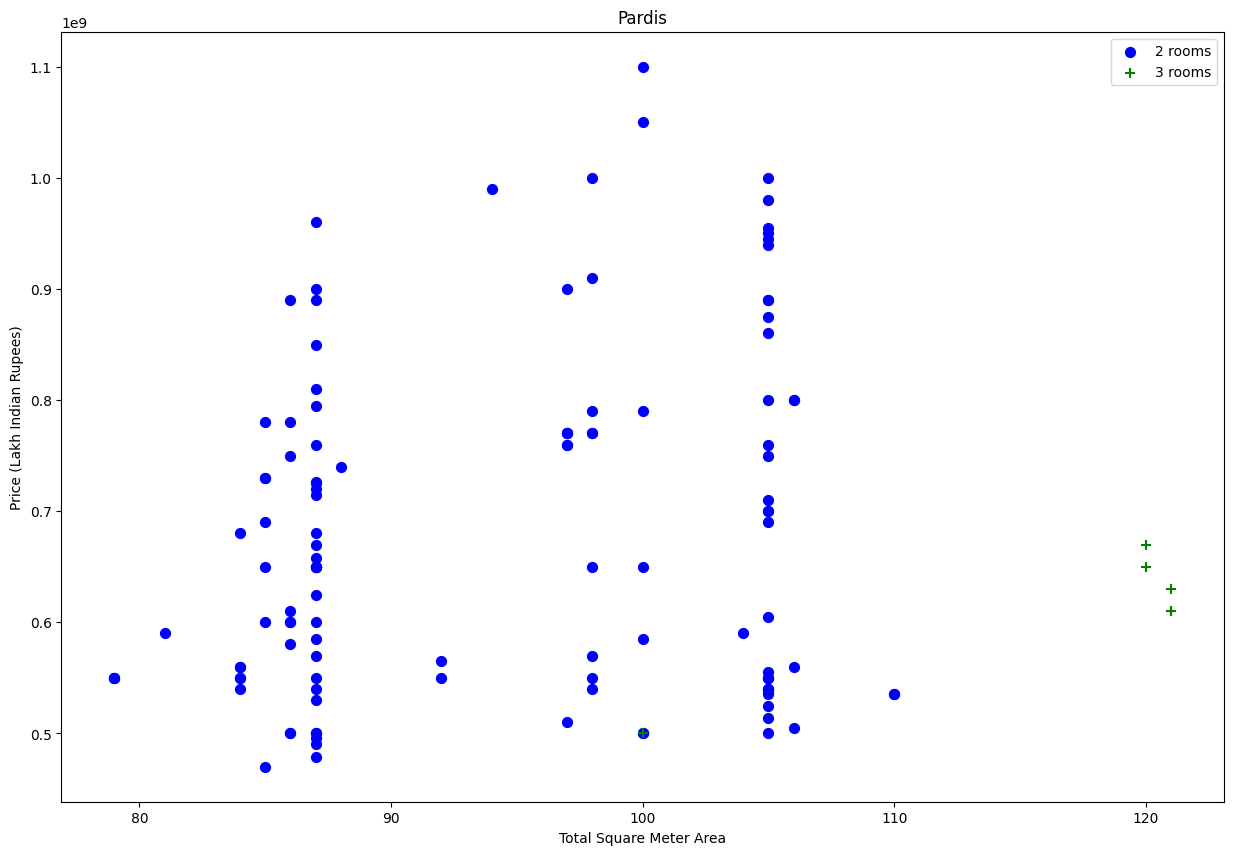

In [38]:
def plot_scatter_chart(df,Address):
    room2 = df[(df.Address==Address) & (df.Room==2)]
    room3 = df[(df.Address==Address) & (df.Room==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(room2.Area,room2.Price,color='blue',label='2 rooms', s=50)
    plt.scatter(room3.Area,room3.Price,marker='+', color='green',label='3 rooms', s=50)
    plt.xlabel("Total Square Meter Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(Address)
    plt.legend()
    
plot_scatter_chart(p_data,"Pardis")

**Fuature Engineering**

**Use One Hot Encoding For Address , Elevator and Wearhouse**

In [39]:
enc_data = p_data.copy()
enc_data = pd.concat([enc_data, pd.get_dummies(enc_data['Address'], prefix='Address', drop_first=True)], axis=1)
enc_data.drop('Address', axis=1, inplace=True)  
enc_data

,Area,Room,Parking,Warehouse,Elevator,Price,Price_USD,Price_Per_sqm,Address_Amirabad,Address_Amirieh,...,Address_Si Metri Ji,Address_Southern Janatabad,Address_Southern Program Organization,Address_Tenant,Address_Velenjak,Address_West Ferdows Boulevard,Address_West Pars,Address_Yousef Abad,Address_Zaferanieh,Address_other
0,79,2,True,True,True,3000000000,100000,37974684,False,False,...,False,False,False,False,False,False,False,False,False,False
1,135,3,True,True,True,6480000000,216000,48000000,False,False,...,False,False,False,False,False,False,False,False,False,False
2,95,2,True,True,True,5600000000,186667,58947368,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95,2,True,True,True,4500000000,150000,47368421,False,False,...,False,False,False,False,False,False,False,False,False,False
4,102,2,True,True,True,5200000000,173333,50980392,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,140,3,True,True,True,8400000000,280000,60000000,False,False,...,False,False,False,False,False,False,False,False,False,True
2592,68,2,False,True,True,1000000000,33333,14705882,False,False,...,False,False,False,False,False,False,False,False,False,True
2593,118,2,True,True,True,7080000000,236000,60000000,False,False,...,False,False,False,False,False,False,False,False,False,True
2594,148,3,True,True,True,6000000000,200000,40540541,False,False,...,False,False,False,False,False,False,False,False,False,True


**Converting str to bin**

In [40]:
enc_data['Parking'] = enc_data['Parking'].astype(int)
enc_data['Warehouse'] = enc_data['Warehouse'].astype(int)
enc_data['Elevator'] = enc_data['Elevator'].astype(int)
enc_data

,Area,Room,Parking,Warehouse,Elevator,Price,Price_USD,Price_Per_sqm,Address_Amirabad,Address_Amirieh,...,Address_Si Metri Ji,Address_Southern Janatabad,Address_Southern Program Organization,Address_Tenant,Address_Velenjak,Address_West Ferdows Boulevard,Address_West Pars,Address_Yousef Abad,Address_Zaferanieh,Address_other
0,79,2,1,1,1,3000000000,100000,37974684,False,False,...,False,False,False,False,False,False,False,False,False,False
1,135,3,1,1,1,6480000000,216000,48000000,False,False,...,False,False,False,False,False,False,False,False,False,False
2,95,2,1,1,1,5600000000,186667,58947368,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95,2,1,1,1,4500000000,150000,47368421,False,False,...,False,False,False,False,False,False,False,False,False,False
4,102,2,1,1,1,5200000000,173333,50980392,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,140,3,1,1,1,8400000000,280000,60000000,False,False,...,False,False,False,False,False,False,False,False,False,True
2592,68,2,0,1,1,1000000000,33333,14705882,False,False,...,False,False,False,False,False,False,False,False,False,True
2593,118,2,1,1,1,7080000000,236000,60000000,False,False,...,False,False,False,False,False,False,False,False,False,True
2594,148,3,1,1,1,6000000000,200000,40540541,False,False,...,False,False,False,False,False,False,False,False,False,True


In [41]:
enc_data.Price_USD.describe()

count      2596
mean     146958
std      171153
min        7833
25%       48050
50%       93333
75%      176667
max     1798333
Name: Price_USD, dtype: float64

**Feature Correlation Heatmap**

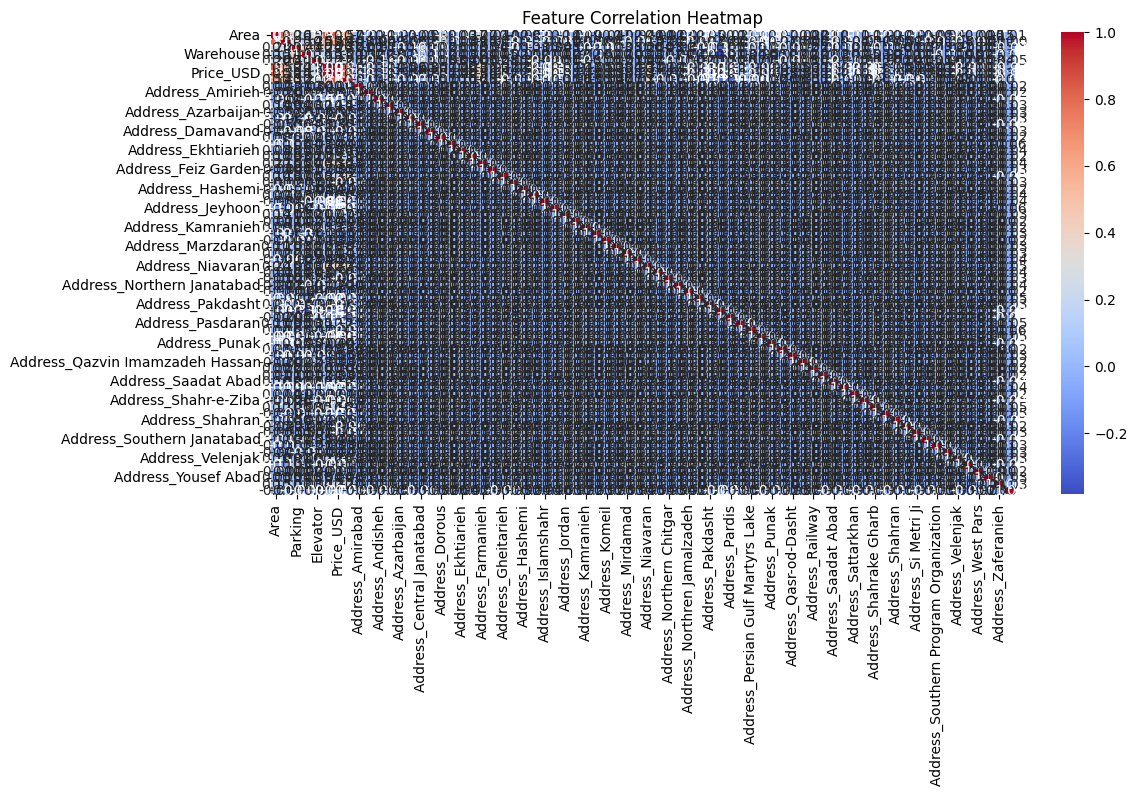

In [65]:
plt.figure(figsize=(12, 6))
sns.heatmap(enc_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

As we can see, Area and Price have a strong positive correlation, meaning that as one increases, the other tends to increase as well. On the other hand, parameters like Address and Elevator show little to no correlation, meaning they don't have a significant impact on the price.

**Preparing Data for Training**

In [42]:
x=enc_data.drop(['Price','Price_Per_sqm','Price_USD'],axis='columns')
x.head()
x

,Area,Room,Parking,Warehouse,Elevator,Address_Amirabad,Address_Amirieh,Address_Andisheh,Address_Aqdasieh,Address_Azarbaijan,...,Address_Si Metri Ji,Address_Southern Janatabad,Address_Southern Program Organization,Address_Tenant,Address_Velenjak,Address_West Ferdows Boulevard,Address_West Pars,Address_Yousef Abad,Address_Zaferanieh,Address_other
0,79,2,1,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,135,3,1,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,95,2,1,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95,2,1,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,102,2,1,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,140,3,1,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2592,68,2,0,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2593,118,2,1,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2594,148,3,1,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [43]:
y=enc_data.Price_USD
y.head()
y

0      100000
1      216000
2      186667
3      150000
4      173333
        ...  
2591   280000
2592    33333
2593   236000
2594   200000
2595   135667
Name: Price_USD, Length: 2596, dtype: float64

**Spliting test and train data**

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**standarding and scaling data**

In [45]:
standard_scaler = StandardScaler()
x_train_scaled = standard_scaler.fit_transform(x_train)
x_test_scaled = standard_scaler.transform(x_test)

Min_Max_scaler = MinMaxScaler()
x_train_scaled = Min_Max_scaler.fit_transform(x_train)
x_test_scaled = Min_Max_scaler.transform(x_test)

**Training the model using Linear Regression** 

In [46]:
lr_clf=LinearRegression()
lr_clf.fit(x_train, y_train)

LinearRegression()

**Evaluating the model**

In [47]:
score = lr_clf.score(x_test, y_test)  
score

0.8925999884527274

**XGBRegressor Fit and Evaluate**

In [48]:
from xgboost import XGBRegressor
xgb_clf = XGBRegressor(n_estimators=100, max_depth=15, learning_rate=0.05, random_state=42)
xgb_clf.fit(x_train, y_train)
print("XGBRegressor Score with non_selected features:", xgb_clf.score(x_test, y_test))


XGBRegressor Score with non_selected features: 0.8473264508602808


**Use K Fold cross validation to measure accuracy of our LinearRegression model**


In [49]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.88349116, 0.87911736, 0.89415504, 0.91513694, 0.87352751])

**Use K Fold cross validation to measure accuracy of our XGBRegressor model**


In [50]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(XGBRegressor(), x, y, cv=cv)

array([0.89992325, 0.89503729, 0.92281119, 0.88609529, 0.92652015])

**Find best model using GridSearchCV**

In [68]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]  
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1, 10],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  
                'splitter': ['best', 'random'],
                'max_depth': [5, 10, None]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100, 200],
                'max_depth': [10, 20, None],
                'min_samples_split': [2, 5, 10]
            }
        },
        'xgboost': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [100, 200, 300],
                'max_depth': [3, 6, 10],
                'learning_rate': [0.01, 0.05, 0.1]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

best_models = find_best_model_using_gridsearchcv(x, y)


In [52]:
print(best_models)


               model  best_score  \
0  linear_regression           1   
1              lasso           1   
2      decision_tree           1   
3      random_forest           1   
4            xgboost           1   

                                         best_params  
0                            {'fit_intercept': True}  
1              {'alpha': 0.1, 'selection': 'random'}  
2  {'criterion': 'friedman_mse', 'max_depth': Non...  
3  {'max_depth': None, 'min_samples_split': 10, '...  
4  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...  


**checking the possiblity of Overfitting**

In [53]:
from sklearn.model_selection import KFold

def check_overfitting(model, x, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    train_scores = cross_val_score(model, x, y, cv=kf, scoring='r2')
    test_scores = cross_val_score(model, x, y, cv=kf, scoring='r2')

    print(f"Train Score Mean: {np.mean(train_scores):.4f}")
    print(f"Test Score Mean: {np.mean(test_scores):.4f}")
    print(f"Score Difference: {abs(np.mean(train_scores) - np.mean(test_scores)):.4f}")
    print("-" * 50)

check_overfitting(DecisionTreeRegressor(max_depth=5), x, y)
check_overfitting(RandomForestRegressor(n_estimators=100, max_depth=10), x, y)
check_overfitting(XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.05), x, y)


Train Score Mean: 0.7819
Test Score Mean: 0.7819
Score Difference: 0.0000
--------------------------------------------------
Train Score Mean: 0.8654
Test Score Mean: 0.8617
Score Difference: 0.0037
--------------------------------------------------
Train Score Mean: 0.8794
Test Score Mean: 0.8794
Score Difference: 0.0000
--------------------------------------------------


As seen from the results, the likelihood of overfitting is very low, and for XGBRegressor, it is nonexistent—even when achieving the highest score of 1. Therefore, we proceed with XGBRegressor as our final model.

**Test the model for few properties**

In [56]:
def predict_price(Address, Area, Elevation, rooms, parking, wearhouse):    
    X = np.zeros(len(x.columns))  
    
    X[0] = Area
    X[1] = Elevation
    X[2] = rooms
    X[3] = parking
    X[4] = wearhouse
    
    if Address in x.columns:
        loc_index = np.where(x.columns == Address)[0][0]
        X[loc_index] = 1  
    else:
        print(f"Warning: Location {Address} not found. Using default location encoding.")
    
    predicted_price = xgb_clf.predict([X])[0]
    
    print(f"Predicted price: {predicted_price:.2f} USD")
    return predicted_price


In [57]:
predicted_price = predict_price('Address_Amirabad', 120, 0, 2, 0, 1)

Predicted price: 158664.23 USD


In [58]:
predicted_price = predict_price('Address_Amirabad', 180, 1, 2, 0, 1)

Predicted price: 323491.59 USD


In [59]:
predicted_price = predict_price('Address_Andisheh', 180, 1, 2, 0, 1)

Predicted price: 158710.27 USD
